In [19]:
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import os
import nltk
from nltk.corpus import stopwords

In [3]:
# !pip install chart_studio
# !pip install spacy

import re
from tqdm import tqdm
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [4]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# function for generating random colors
def random_colors(n):
    colors = []
    for i in range(n):
        colors.append("#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [156]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [137]:
train

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
5      28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
6      6e0c6d75b1  2am feedings for the baby are fun when he is a...   
7      50e14c0bb8                                         Soooo high   
8      e050245fbd                                        Both of you   
9      fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....   
10     2339a9b08b   as much as i love to be hopeful, i reckon the...   
11     16fab9f95b  I really really like the song Love Story by Ta...   
12     74a76f6e0a       My Sharpie is running DANGERously low on ink   
13     04dd1d2e34  i want to go to music tonight but i lost my vo...   
14     bbe3cbf620                         test test from the LG enV2   
15     8a939bfb59                              Uh oh, I am sunburned   
16     3440297f8b   S`ok, trying to plot alternatives as we speak...   
17     919fa93391  i`ve been sick for the past few days  and thus...   
18     af3fed7fc3         is back home now      gonna miss every one   
19     40e7becabf                         Hes just not that into you   
20     04d17ef61e   oh Marly, I`m so sorry!!  I hope you find her...   
21     e48b0b8a23  Playing Ghost Online is really interesting. Th...   
22     7de057cf40  is cleaning the house for her family who is co...   
23     9ce5570064  gotta restart my computer .. I thought Win7 wa...   
24     0c8cc71c46  SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...   
25     e00c6ef376  the free fillin` app on my ipod is fun, im add...   
26     852edc3769                                         I`m sorry.   
27     bdc32ea43c  On the way to Malaysia...no internet access to...   
28     6ce4a4954b  juss came backk from Berkeleyy ; omg its madd ...   
29     d22e6d40a7  Went to sleep and there is a power cut in Noid...   
...           ...                                                ...   
27451  16947b5a23   happy all my studying and all nighters payed off   
27452  af9f223e1f  so much for a day off- I`ve been on my feet, a...   
27453  a01e5d1ddf                               it`s beeen onee year   
27454  465b9edc97  _mayer I`d like to see a picture of you, Carl ...   
27455  768e382964  simple greetings from unexpected people can ac...   
27456  d32efe060f     i wanna leave work already! Not feelin it 2day   
27457  58804bf427                              My camera is brokennn   
27458  ea8072c6a6  I really wish someone would make a groupchat t...   
27459  13e1519ce3                          good as, cya in melbourne   
27460  17c8c317f0  Scream just played on my iPod. First thing tha...   
27461  c37b979e7e   again thanks to my dear neighboor who also ga...   
27462  3f9912ec7a  Just back from bingo w/family -- I won over $1...   
27463  a38bf809b0   LIKE DREW SAID 'GIVE TC A CHANCE' WE WILL MIS...   
27464  e7eecffdc8  rec game....trying not to cry...the pain is to...   
27465  c14a543497   Sure. I`ll try n keep that up! =P You enjoy s...   
27466  7e8b34de71   Naw.. it was pretty tame. Only 1 guy in costu...   
27467  432e6de6c9  morning twit-friends! welcome to my new followers   
27468  a753a93e45  few grilled mushrooms and olives, feta cheese ...   
27469  ac92790d8b              94 more days till BH comes back to LA   
27470  778184dff1   lol i know  and haha..did you fall asleep?? o...   
27471  15bb120f57  i`m defying gravity. and nobody in alll of oz,...   
27472  8f5adc47ec  http://twitpic.com/663vr - Wanted to visit the...   
27473  a208770a32   in spoke to you yesterday and u didnt respond...   
27474  8f14bb2715  So I get up early and I feel goo

In [138]:
train[train['sentiment'] == 'neutral']

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
5      28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
7      50e14c0bb8                                         Soooo high   
8      e050245fbd                                        Both of you   
10     2339a9b08b   as much as i love to be hopeful, i reckon the...   
14     bbe3cbf620                         test test from the LG enV2   
19     40e7becabf                         Hes just not that into you   
20     04d17ef61e   oh Marly, I`m so sorry!!  I hope you find her...   
22     7de057cf40  is cleaning the house for her family who is co...   
23     9ce5570064  gotta restart my computer .. I thought Win7 wa...   
24     0c8cc71c46  SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...   
34     d21ab5855b   Ahhh, I slept through the game.  I`m gonna tr...   
35     4f5267ad70  Thats it, its the end. Tears for Fears vs Eric...   
37     1cbc812ece  just in case you wonder, we are really busy to...   
40     d93afa85cf   Car not happy, big big dent in boot! Hoping t...   
42     2e7082d1c8                                           MAYDAY?!   
43     684081e4e7  RATT ROCKED NASHVILLE TONITE..ONE THING SUCKED...   
45     a9d499e123  The girl in the hair salon asked me 'Shall I t...   
47     c3924dc9e4               :visiting my friendster and facebook   
50     a3ae670885   Then you should check out http://twittersucks...   
51     15d5f3a41b   also bored at school, its my third freelesson...   
52     3c4a21b2cb                        hm... Both of us I guess...   
55     e77fd45003   I`d rather do the early run..but I am a morni...   
57     6086b1f016      will be back later.  http://plurk.com/p/rp3k7   
59     90f3d2b572                      what fun are you speaking of?   
61     a4b0888da6                                           haha yes   
65     23e1f7dca4                                Is at a photoshoot.   
67     c34feef039  Yay playing a show tonight! Boo it`s gonna sog...   
69     187494c25b             If you know such agent, do let me know   
70     4213627c3c               I still smell of smoke  #kitchenfire   
...           ...                                                ...   
27406  2dc0c68463                                Im moving to canada   
27408  f21fb7a773  Just got home from the BEA & it was kinda bori...   
27409  c504d1f526  _g my day just hasnt been the same without ur ...   
27411  5f3ba4cbe2  getting ready to drop off something to my man ...   
27416  2ef8bef8cf  'We did it we did it oh yea yea yea no eating ...   
27418  9d76d0e90b                                  he calls me bella   
27421  873faae537  Idk yet!!! _Gyrl I wanna go soon tho...but I w...   
27422  b3270b06a3                                  Plan, successful?   
27430  94d53c443b                I can`t believe tour is almost over   
27431  e864dc53b4   Aaaah, the same old same, I see ^^ We share a...   
27432  189879e1f2                               Mmmmmm.... Coffee...   
27437  99974a51c5   I would never do such a thing!  The only thin...   
27441  aec8d3c1e5   Wanted to get that piercing too but thought i...   
27442  04ff8fc3ae   staying in, hve June exams 4 docent training ...   
27444  7e1ee83e72  Ps Brian just announced his message title, 'wh...   
27445  3aee463b5d   Yup, sometimes kc it`s raining here in Pque b...   
27447  a9f0aa00e2  is having carbonara for dinner made by my mum mom   
27448  6c6aad2026    but that is the only logical reason why you`...   
27449  46b2ecf52e                   haha malamang as one of my chef.   
27450  829cad7b81                     did you find the Colossus yet?   
27452  af9f223e1f  so much for a day off- I`ve been on my feet, a...   
27453  a01e5d1ddf                               it`s beeen onee year   
27457  58804bf427                              My camera is brokennn   
27460  17c8c317f0  Scream just played on my iPod. F

Most of the selected text in neutral case is as it is as text.

In [139]:
test.head()

textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative
3  01082688c6                                        happy bday!  positive
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive

In [140]:
train.shape

(27481, 4)

In [141]:
test.shape

(3534, 3)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
textID           27481 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27481 non-null object
dtypes: object(4)
memory usage: 858.9+ KB


In [143]:
train.describe()

textID                                               text  \
count        27481                                              27480   
unique       27481                                              27480   
top     71a57755f6   sorry we didn`t get a chance to chat at #scre...   
freq             1                                                  1   

       selected_text sentiment  
count          27480     27481  
unique         22463         3  
top             good   neutral  
freq             199     11118

In [144]:
train['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [157]:
train.dropna(inplace = True)

In [158]:
train_data = train.copy()

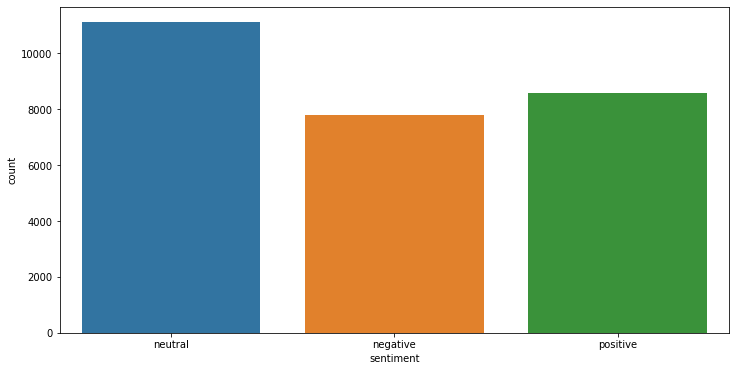

In [146]:
plt.figure(figsize=(12,6))
sns.countplot(x ='sentiment',data = train)

In [24]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by = 'text', ascending = False)
temp.style.background_gradient(cmap = 'Purples')

In [25]:
fig = go.Figure(go.Funnelarea(
    text = temp['sentiment'],
    values = temp['text'],
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

What do we currently Know About our Data:

We Know that selected_text is a subset of text
We know that selected_text contains only one segment of text,i.e,It does not jump between two sentences.\
For Eg:- If text is 'Spent the entire morning in a meeting w/ a vendor, and my boss was not happy w/ them. Lots of fun. \
I had other plans for my morning' The selected text can be 'my boss was not happy w/ them. Lots of fun' or 'Lots of fun' \
but cannot be 'Morning,vendor and my boss,
We know that neutral tweets have a high percentage of similarity between text and selected_text

## Generating Meta-Features 

In [36]:
def jaccard_score(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c))/(len(a) + len(b) - len(c))

In [40]:
result_jaccard_score = []
for index, row in train.iterrows():
    text = row[1]
    selected_text = row[2]   
    jaccard_score_temp = jaccard_score(text, selected_text)
    result_jaccard_score.append([text, selected_text, jaccard_score_temp])

In [41]:
jaccard = pd.DataFrame(result_jaccard_score,columns = ["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how = 'outer')

In [43]:
train['NumWT'] = train['text'].apply(lambda x : len(str(x).split()))
train['NumWST'] = train['selected_text'].apply(lambda x : len(str(x).split()))
train['Difference_in_words'] = train['NumWT'] - train['NumWST']

In [44]:
train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  jaccard_score  NumWT  \
0  I`d have responded, if I were going   neutral       1.000000      7   
1                             Sooo SAD  negative       0.200000     10   
2                          bullying me  negative       0.166667      5   
3                       leave me alone  negative       0.600000      5   
4                        Sons of ****,  negative       0.214286     14   

   NumWST  Difference_in_words  
0       7                    0  
1       2                    8  
2       2                    3  
3       3                    2  
4       3                   11

In [45]:
hist_data = [train['NumWST'] ,train['NumWT']]

group_labels = ['Selected_Text', 'Text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(title_text = 'Distribution of Number Of words')
fig.update_layout(
    autosize = False,
    width = 900,
    height = 700,
    paper_bgcolor = "LightSteelBlue",
)
fig.show()

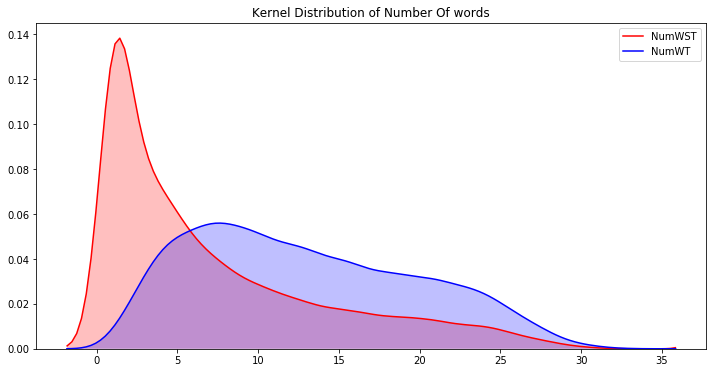

In [46]:
plt.figure(figsize=(12,6))
p1 = sns.kdeplot(train['NumWST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1 = sns.kdeplot(train['NumWT'], shade=True, color="b")

### Now It will be more interesting to see the differnce in number of words and jaccard_scores across different Sentiments

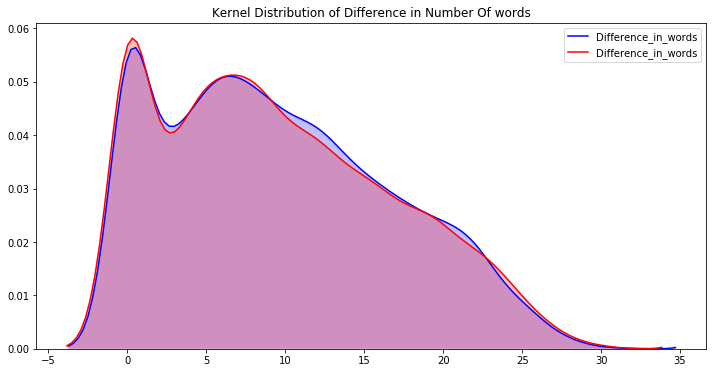

In [47]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment'] == 'positive']['Difference_in_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train[train['sentiment'] == 'negative']['Difference_in_words'], shade=True, color="r")

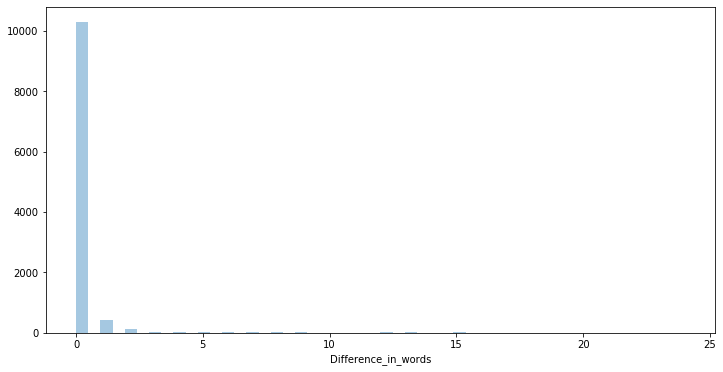

In [49]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['Difference_in_words'],kde=False)

i was not able to plot kde plot for neutral tweets because most of the values for difference in number of words were zero. We can see it clearly now ,if we had used the feature in the starting we would have known that text and selected text are mostly the same for neutral tweets,thus its always important to keep the end goal in mind while performing EDA

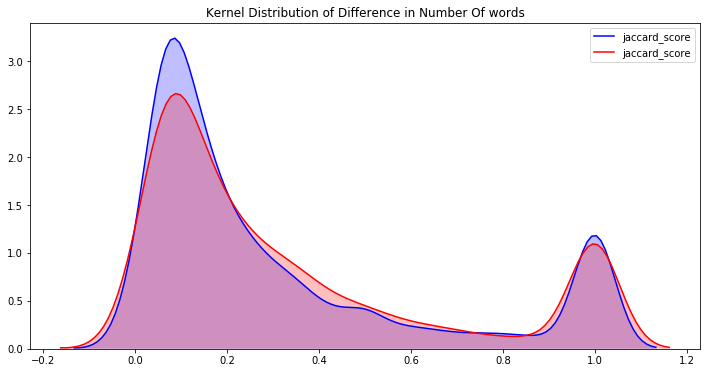

In [48]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment'] == 'positive']['jaccard_score'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train[train['sentiment'] == 'negative']['jaccard_score'], shade=True, color="r")

I was not able to plot kde of jaccard_scores of neutral tweets for the same reason,thus I will plot a distribution plot

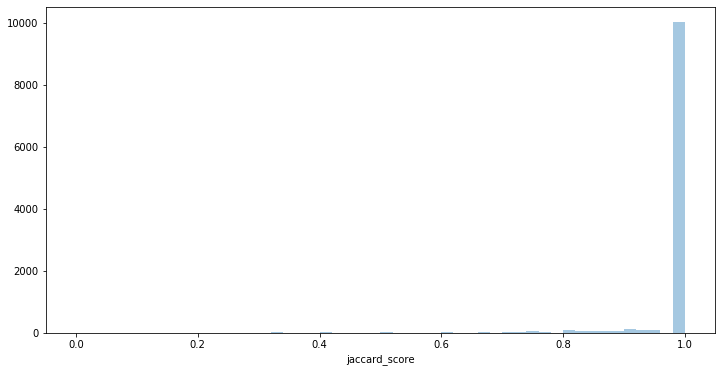

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['jaccard_score'],kde=False)

We can see some interesting trends here:

Positive and negative tweets have high kurtosis and thus values are concentrated in two regions narrow and high density
Neutral tweets have a low kurtosis value and their is bump in density near values of 1
For those who don't know :

Kurtosis is the measure of how peaked a distribution is and how much spread it is around that peak
Skewness measures how much a curve deviates from a normal distribution


### Conclusion of EDA 

We can see from the jaccard score plot that there is peak for negative and positive plot around score of 1 .\
That means there is a cluster of tweets where there is a high similarity between text and selected texts ,\
if we can find those clusters then we can predict text for selected texts for those tweets irrespective of segment
Let's see if we can find those clusters,one interesting idea would be to check tweets which have number of words lesss than 3 in text\
, because there the text might be completely used as text

In [54]:
k = train[train['NumWT'] <= 2]

In [55]:
k.groupby('sentiment').mean()['jaccard_score']

sentiment
negative    0.788580
neutral     0.977805
positive    0.765700
Name: jaccard_score, dtype: float64

In [57]:
k[k['sentiment']=='positive'].head(10)

textID                              text  \
68   fa2654e730                          Chilliin   
80   bbbc46889b   THANK YYYYYYYYYOOOOOOOOOOUUUUU!   
170  f3d95b57b1                      good morning   
278  89d5b3f0b5                            Thanks   
429  a78ef3e0d0                       Goodmorning   
443  641db1b766                   Morning tweeple   
544  1689a46690                      sweet dreams   
915  c16a52d2a7                       nice clutch   
976  6c7f3f8a21                           Welcome   
982  7411938f57                           I sorry   

                       selected_text sentiment  jaccard_score  NumWT  NumWST  \
68                          Chilliin  positive            1.0      1       1   
80   THANK YYYYYYYYYOOOOOOOOOOUUUUU!  positive            1.0      2       2   
170                     good morning  positive            1.0      2       2   
278                           Thanks  positive            1.0      1       1   
429                      Goodmorning  positive            1.0      1       1   
443                  Morning tweeple  positive            1.0      2       2   
544                     sweet dreams  positive            1.0      2       2   
915                             nice  positive            0.5      2       1   
976                          Welcome  positive            1.0      1       1   
982                          I sorry  positive            1.0      2       2   

     Difference_in_words  
68                     0  
80                     0  
170                    0  
278                    0  
429                    0  
443                    0  
544                    0  
915                    1  
976                    0  
982                    0

We can see for the positive tweets having length less than 3, they have almost the same selected_text as text

In [58]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()                                               # converting uppercase to lowercase
    text = re.sub('\[.*?\]', '', text)                                     # removing 
    text = re.sub('https?://\S+|www\.\S+', '', text)                       # removing headers of links
    text = re.sub('<.*?>+', '', text)                                      # removing speacial characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)        # 
    text = re.sub('\n', '', text)                                          # removing 
    text = re.sub('\w*\d\w*', '', text)
    return text

In [59]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [60]:
train.head()

textID                                               text  \
0  cb774db0d1                  id have responded if i were going   
1  549e992a42         sooo sad i will miss you here in san diego   
2  088c60f138                             my boss is bullying me   
3  9642c003ef                      what interview leave me alone   
4  358bd9e861   sons of  why couldnt they put them on the rel...   

                       selected_text sentiment  jaccard_score  NumWT  NumWST  \
0  id have responded if i were going   neutral       1.000000      7       7   
1                           sooo sad  negative       0.200000     10       2   
2                        bullying me  negative       0.166667      5       2   
3                     leave me alone  negative       0.600000      5       3   
4                           sons of   negative       0.214286     14       3   

   Difference_in_words  
0                    0  
1                    8  
2                    3  
3                    2  
4                   11

## Most Common Words in our target - Selected_text 

In [66]:
train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())

In [67]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

In [68]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap = 'Blues')

In [69]:
fig = px.bar(temp, x = "count", y = "Common_words", title = 'Commmon Words in Selected Text', orientation = 'h', 
             width = 700, height = 700,color = 'Common_words')
fig.show()

In [70]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

### Most Common Words in Text 

In [71]:
train['temp_list1'] = train['text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [72]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [73]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

So we can see the Most common words in Selected text and Text are almost the same,which was obvious

In [74]:
fig = px.treemap(temp, path=['Common_words'], values='count', title='Tree of Most Common Words')
fig.show()

### Most Common Words Sentiment Wise 

In [75]:
Positive_sent = train[train['sentiment'] == 'positive']
Negative_sent = train[train['sentiment'] == 'negative']
Neutral_sent = train[train['sentiment'] == 'neutral']

In [76]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [77]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [78]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [79]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [80]:
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [84]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [83]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

We can see words like get,go,dont,got,u,cant,lol,like are common in all three segments . That's interesting because words like dont and cant are more of negative nature and words like lol are more of positive nature.Does this mean our data is incorrectly labelled , we will have more insights on this after N-gram analysis
It will be interesting to see the word unique to different sentiments

### WordCloud of text on basis of Sentiment 

In [110]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(15, 8), color = 'black',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width = 1000, 
                    height = 500,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
# d = '/kaggle/input/masks-for-wordclouds/'

I have added more words like im , u (that we say were there in the most common words,disturbing our analysis) as stopwords

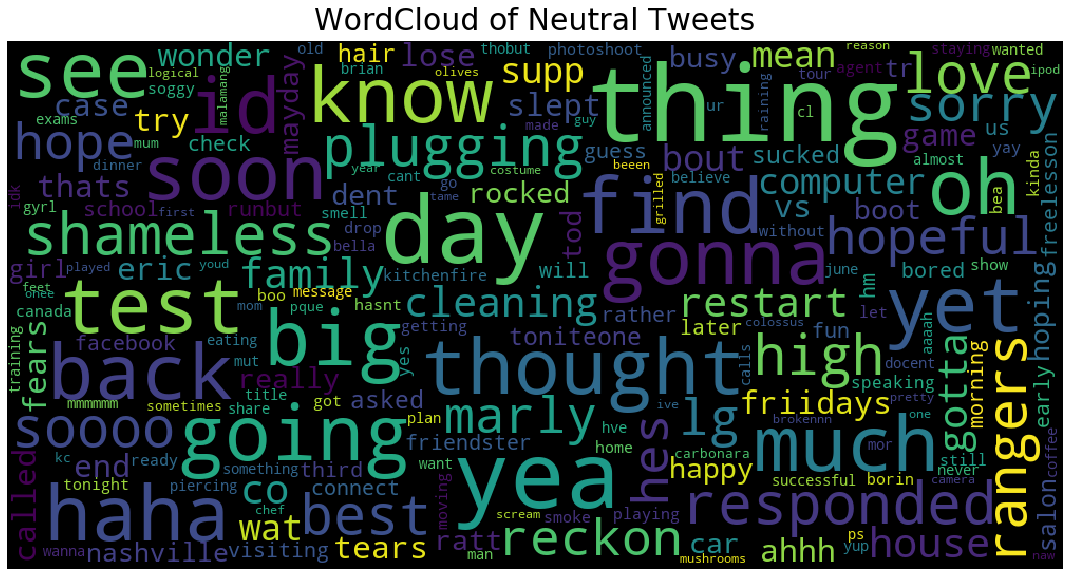

In [111]:
# pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Neutral_sent.text, title_size = 20, title="WordCloud of Neutral Tweets")

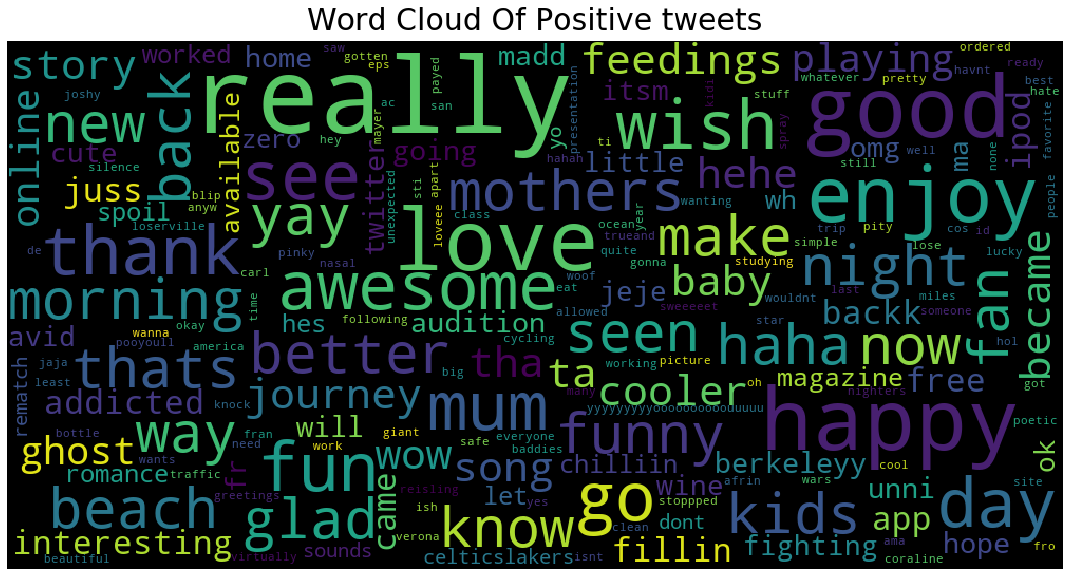

In [112]:
plot_wordcloud(Positive_sent.text, title="Word Cloud Of Positive tweets", title_size=30)

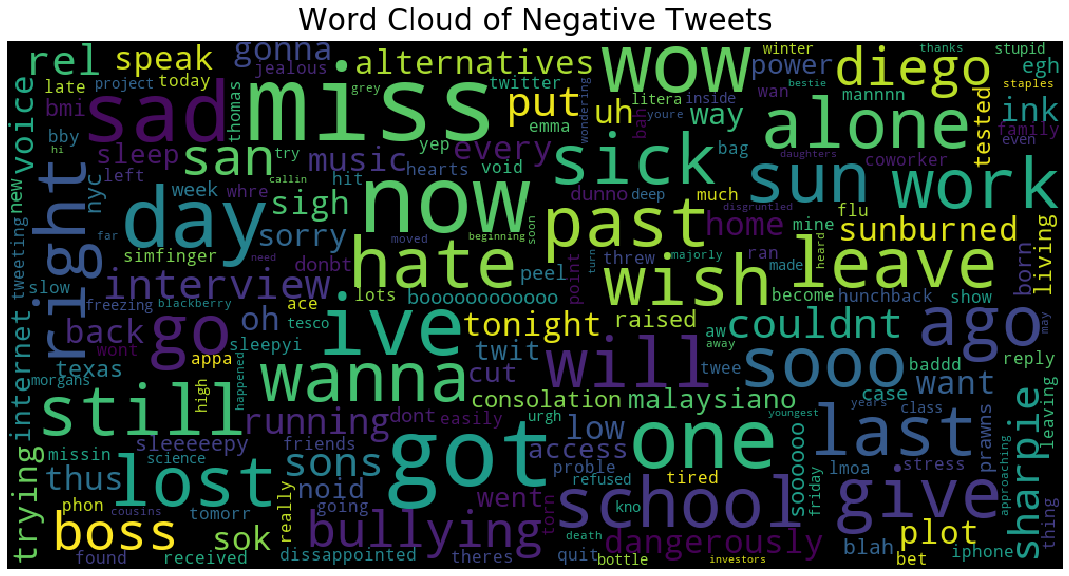

In [114]:
plot_wordcloud(Negative_sent.text, title="Word Cloud of Negative Tweets",title_size=30)

## Modelling

Training for positive sentiment

In [117]:
def get_training_data(sentiment):
    training_data = []
    for data in train_data.values:  
        if data[3] == sentiment:
            text = data[1]
            selected_text = data[2]
            start = text.find(selected_text)
            end = start + len(selected_text)
            training_data.append((text, {'entities' : [[start, end, 'selected_text']]}))
    return training_data

In [118]:
def get_model_out_path(sentiment):
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    else:
        model_out_path = 'models/model_neu'
    return model_out_path

In [119]:
def save_model(output_dir, nlp, new_model_name):
    output_dir = f'../tweet-sentiment-extraction/{output_dir}'
    if output_dir is not None:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta['name'] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to ", output_dir)

In [120]:
def train(training_data, output_dir, n_iter = 20, model = None):
    if model is not None:
        nlp = spacy.load(output_dir)
        print("Loaded model '%s'", model)
    else:
        nlp = spacy.blank("en")
        print("Created Blank en model")
        
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last = True)
    else:
        ner = nlp.get_pipe("ner")
        
    for _,annotations in training_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])
            
    # get names of other pipe to disable them during training
    other_pipes = [x for x in nlp.pipe_names if x != 'ner']
    with nlp.disable_pipes(*other_pipes):
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()
            
        for itn in tqdm(range(n_iter)):
            random.shuffle(training_data)
            batches = minibatch(training_data, size = compounding(4.0, 500.0, 1.001))
            losses = {}
            for batch in batches:
                text, annotations = zip(*batch)
                nlp.update(
                    text,
                    annotations,
                    drop = 0.5,
                    losses = losses
                )
            print("losses : ", losses)
        save_model(output_dir, nlp, 'st_ner')

In [40]:
sentiment = 'positive'

training_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(training_data, model_path, n_iter = 2, model = None)

Created Blank en model


 50%|█████████████████████████████████████████▌                                         | 1/2 [02:30<02:30, 150.25s/it]

losses :  {'ner': 34575.778569011134}


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [04:57<00:00, 148.77s/it]

losses :  {'ner': 31155.61120122634}


Saved model to  ../tweet-sentiment-extraction/models/model_pos


In [41]:
sentiment = 'negative'

training_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(training_data, model_path, n_iter = 2, model = None)

Created Blank en model


 50%|█████████████████████████████████████████▌                                         | 1/2 [02:20<02:20, 140.30s/it]

losses :  {'ner': 32273.048402461223}


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [04:40<00:00, 140.34s/it]

losses :  {'ner': 29128.6120024494}
Saved model to  ../tweet-sentiment-extraction/models/model_neg


In [42]:
sentiment = 'neutral'

training_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(training_data, model_path, n_iter = 2, model = None)

Created Blank en model


 50%|█████████████████████████████████████████▌                                         | 1/2 [02:55<02:55, 175.82s/it]

losses :  {'ner': 7281.323358152095}


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [06:28<00:00, 194.04s/it]

losses :  {'ner': 5473.802274180385}
Saved model to  ../tweet-sentiment-extraction/models/model_neu


jaccard score on train data

In [148]:
TRAINED_MODELS_BASE_PATH = '../tweet-sentiment-extraction/models/'

In [149]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0] : ent_array[0][1]] if len(ent_array) > 1 else text
    return selected_text

In [150]:
test['text'][2], test['sentiment'][2]

('Recession hit Veronique Branquinho, she has to quit her company, such a shame!',
 'negative')

In [151]:
doc = model_neg(test['text'][2])
print(doc, len(test['text'][2]))
print(doc.ents, doc.ents[0])
print(doc.ents[0].label_)

Recession hit Veronique Branquinho, she has to quit her company, such a shame! 78
(Recession hit Veronique Branquinho, she has to quit her company, such a shame!,) Recession hit Veronique Branquinho, she has to quit her company, such a shame!
selected_text


In [152]:
start = test['text'][2].find(doc.ents[0].text)
end = start + len(doc.ents[0].text)
label = doc.ents[0].label_
print(start, end, label)

0 78 selected_text


In [153]:
def jaccard(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c))/(len(a) + len(b) - len(c))

In [154]:
if TRAINED_MODELS_BASE_PATH is not None:
    print("Loading models from ", TRAINED_MODELS_BASE_PATH)
    model_pos = spacy.load(TRAINED_MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(TRAINED_MODELS_BASE_PATH + 'model_neg')
    model_neu = spacy.load(TRAINED_MODELS_BASE_PATH + 'model_neu')
    
    jaccard_score = 0
    for index, row in tqdm(train_data.iterrows(), total = train_data.shape[0]):
        text = row.text
        if row.sentiment == 'positive':
            jaccard_score += jaccard(predict_entities(text, model_pos), row.selected_text)
        elif row.sentiment == 'negative':
            jaccard_score += jaccard(predict_entities(text, model_neg), row.selected_text)
        else:
            jaccard_score += jaccard(predict_entities(text, model_neu), row.selected_text)    
    print(f'Average Jaccard Score is {jaccard_score / train_data.shape[0]}')

Loading models from  ../tweet-sentiment-extraction/models/


100%|████████████████████████████████████████████████████████████████████████████| 27480/27480 [05:13<00:00, 87.56it/s]

Average Jaccard Score is 0.5890763881111541


This is on n_iter = 2, on n_iter = 20 we get .65 accuracy

In [155]:
if TRAINED_MODELS_BASE_PATH is not None:
    print("Loading models from ", TRAINED_MODELS_BASE_PATH)
    model_pos = spacy.load(TRAINED_MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(TRAINED_MODELS_BASE_PATH + 'model_neg')
    model_neu = spacy.load(TRAINED_MODELS_BASE_PATH + 'model_neu')
    
    final_data = []
    for index, row in tqdm(test.iterrows(), total = test.shape[0]):
        text = row.text
        if row.sentiment == 'positive':
            final_data.append(predict_entities(text, model_pos))
        elif row.sentiment == 'negative':
            final_data.append(predict_entities(text, model_neg))
        else:
            final_data.append(predict_entities(text, model_neu))

Loading models from  ../tweet-sentiment-extraction/models/


100%|██████████████████████████████████████████████████████████████████████████████| 3534/3534 [00:42<00:00, 83.61it/s]


In [160]:
test.head()

textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative
3  01082688c6                                        happy bday!  positive
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive

In [161]:
sample.head()

textID  selected_text
0  f87dea47db            NaN
1  96d74cb729            NaN
2  eee518ae67            NaN
3  01082688c6            NaN
4  33987a8ee5            NaN

In [162]:
testID = test['textID']

In [164]:
df = pd.DataFrame(list(zip(testID, final_data)), columns = ['textID', 'selected_text'])

In [165]:
df.head()

textID                                      selected_text
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh
1  96d74cb729   Shanghai is also really exciting (precisely -...
2  eee518ae67  Recession hit Veronique Branquinho, she has to...
3  01082688c6                                        happy bday!
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!

In [166]:
df.to_csv("submission.csv", index=False)
print("successfully saved")

successfully saved


In [60]:
final_data[:5]

['Last session of the day  http://twitpic.com/67ezh',
 ' Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).',
 'Recession hit Veronique Branquinho, she has to quit her company, such a shame!',
 ' happy bday!',
 ' http://twitpic.com/4w75p - I like it!!']

## Some Learnings 

Just a small performance related comment - itertuples is faster than iterrows here:

With iterrows:

In [172]:
%%timeit

results_jaccard = []
for ind, row in train_data.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text
    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

10 s ± 2.79 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


With itertuples:

In [173]:
%%timeit

results_jaccard=[]

for row in train.itertuples():
    sentence1 = row.text
    sentence2 = row.selected_text
    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

292 ms ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
